<a href="https://colab.research.google.com/github/aristriana/KI_Tasks/blob/main/EndTermTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Aristriana Muhamad<br>
NPM: 2106709043

RNN ref: https://www.kaggle.com/code/alkidiarete/fake-news-detection-eda-rnn/notebook

In [1]:
!pip install twython

In [2]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.6 MB/s eta 0:00:00


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.metrics import precision_score, recall_score, f1_score
from tqdm.notebook import tqdm
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
import string
import missingno as msno
sns.set(style="whitegrid")


import warnings
warnings.filterwarnings('ignore')

In [4]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [5]:
import gdown

In [6]:
!gdown 1UtuTHKYXH9WiaZ-tNmkxShHyQoxV2quG

Downloading...
From: https://drive.google.com/uc?id=1UtuTHKYXH9WiaZ-tNmkxShHyQoxV2quG
To: /content/true.csv
100% 53.6M/53.6M [00:01<00:00, 43.0MB/s]


In [7]:
!gdown 1J9RtdGeQQku68a8Vjy1XQs7bECleW3_l

Downloading...
From: https://drive.google.com/uc?id=1J9RtdGeQQku68a8Vjy1XQs7bECleW3_l
To: /content/fake.csv
100% 62.8M/62.8M [00:01<00:00, 41.6MB/s]


In [8]:
true = pd.read_csv("true.csv")
fake = pd.read_csv("fake.csv")

In [9]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [10]:
true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


<Axes: >

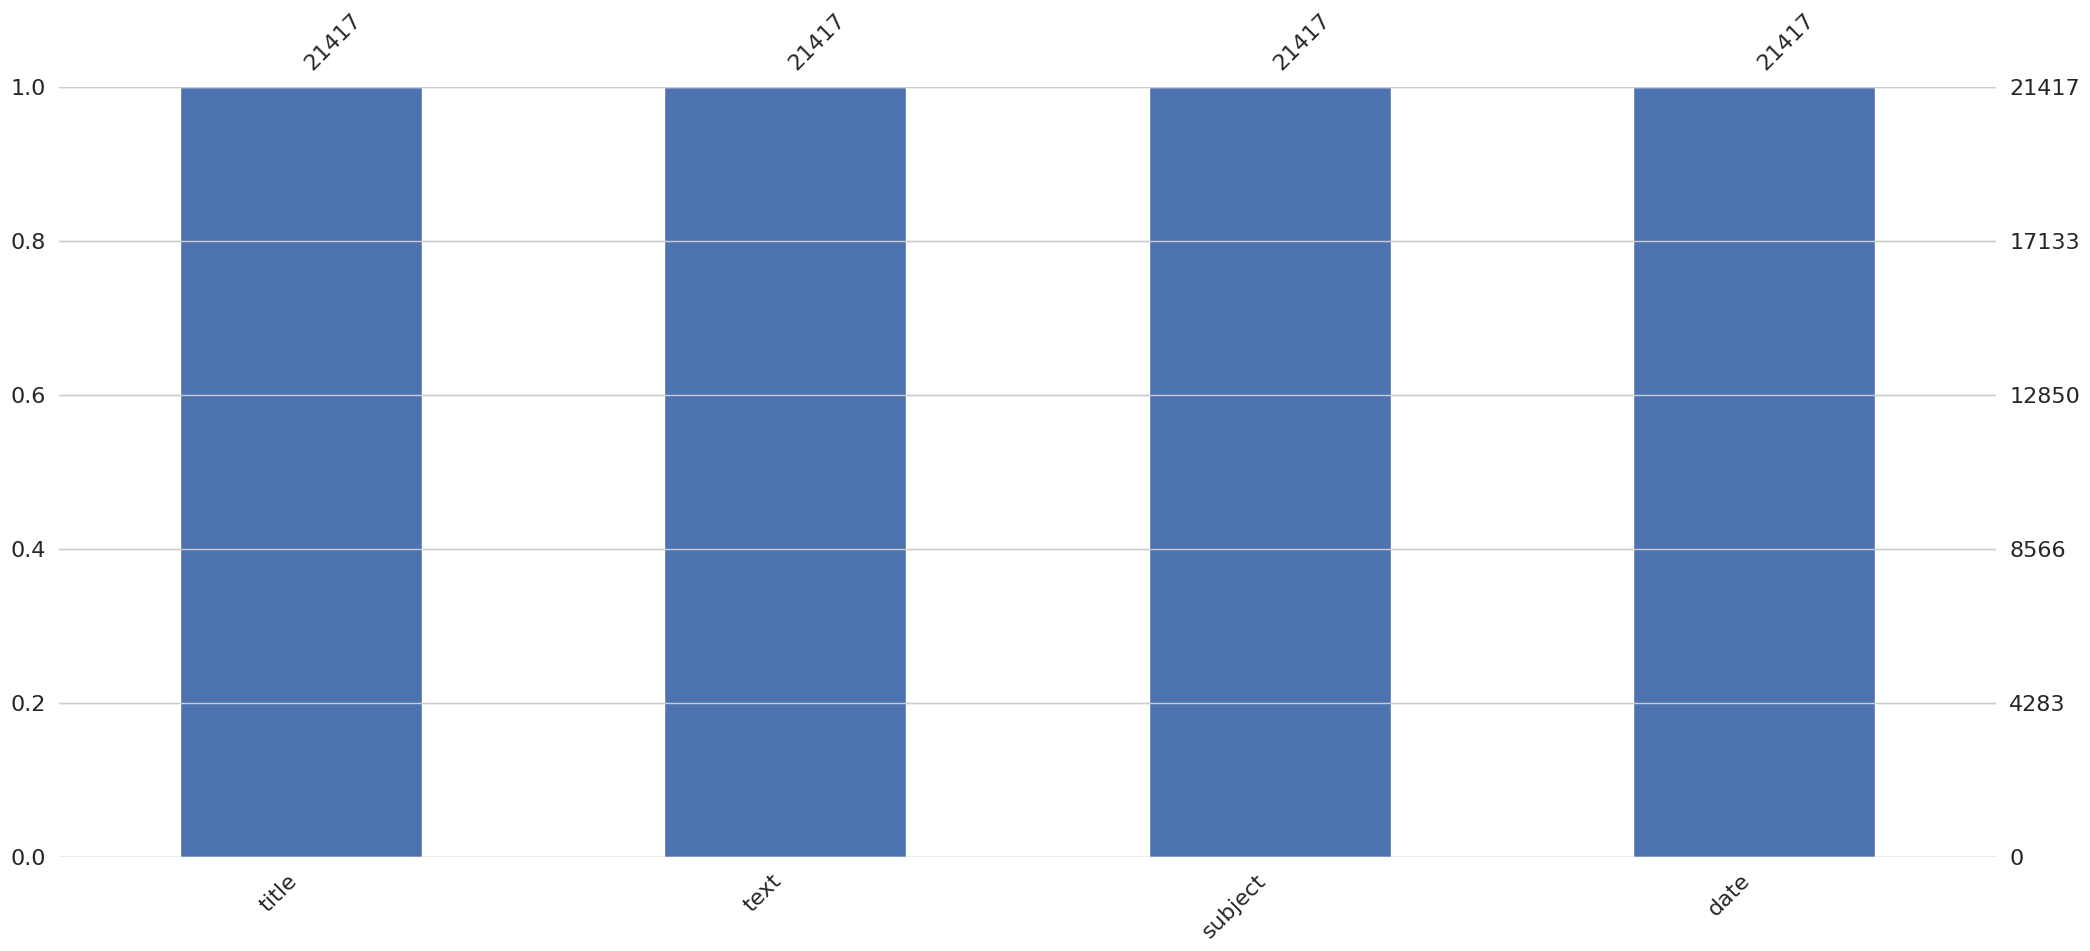

In [11]:
msno.bar(true, color = 'b')

In [12]:
true.duplicated().sum()

206

In [13]:
true.drop_duplicates(inplace=True)

In [14]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [15]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


<Axes: >

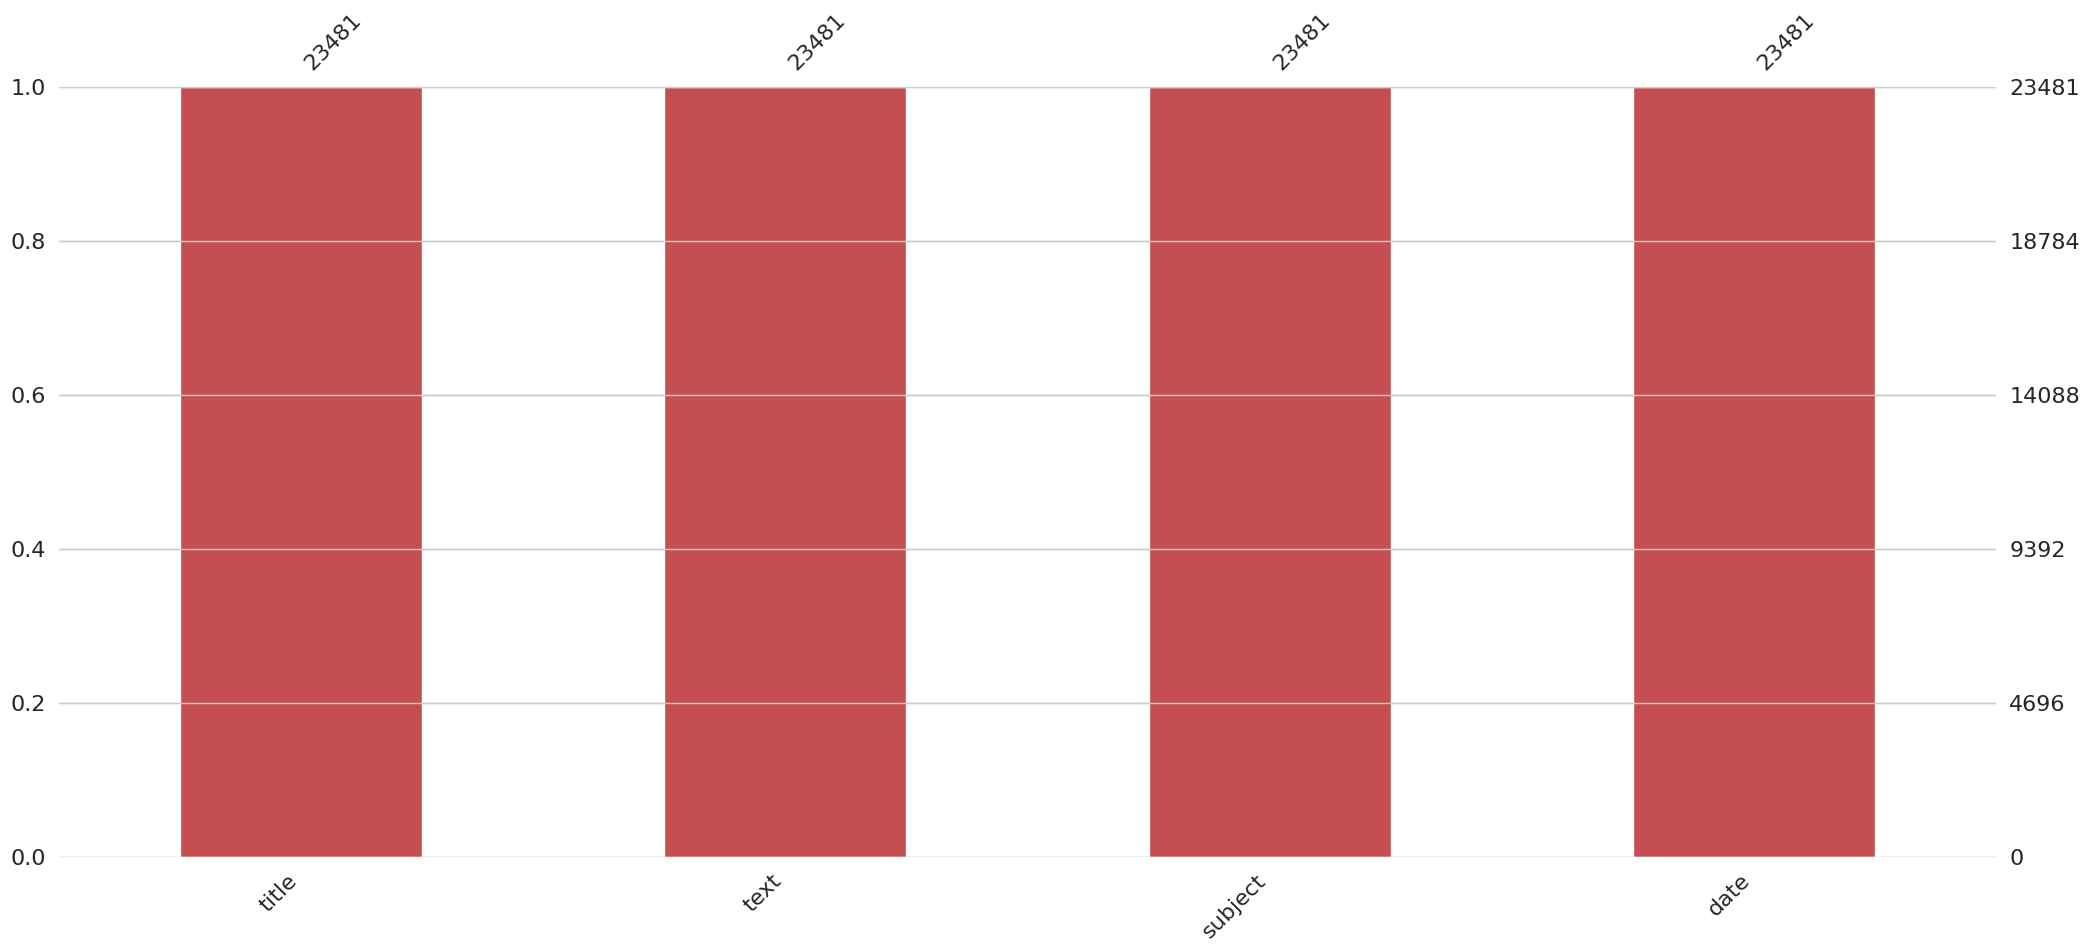

In [16]:
msno.bar(fake, color = 'r')

In [17]:
fake.duplicated().sum()

3

In [18]:
fake.drop_duplicates(inplace=True)

##Feature Engineering

In [19]:
true['label'] = 0
fake['label'] = 1

df = pd.concat([fake, true], ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True)

In [20]:
df['date'] = pd.to_datetime(df['date'],format='mixed', dayfirst=True, errors='coerce')

df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month_name()

In [21]:
df.columns = df.columns.str.replace('_', ' ').str.title()

In [22]:
from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')

stopword = set(stopwords.words('english'))
print(stopword)

{'off', 'from', 'their', 'have', 'we', 'our', 'again', 'so', "that'll", 'll', 'my', 'them', 'of', 'being', 'down', 'some', 're', 'doesn', 'under', 'below', 'after', 'or', 'against', 'few', 'haven', "don't", 'during', 'isn', 'are', 'once', 'you', 'needn', 'aren', "should've", 'on', 'her', 'about', 'himself', 'o', 'at', 'has', 'each', 'all', 'these', 'but', 'by', 'hadn', 'm', 'mustn', 'over', 'am', 'she', 'because', 'this', "she's", 'in', "shouldn't", 'up', "you're", 'having', "doesn't", 'into', 'that', 'such', 'those', 'itself', 'too', 'him', 'don', 'he', 'whom', 'through', 'y', "shan't", 'only', 'myself', "you'll", 'for', 'should', "hasn't", 'wasn', 'they', 'was', "mustn't", "you'd", 'when', "couldn't", 'did', 'most', 'couldn', 'ma', 'herself', 'can', 'not', 'both', 'how', "mightn't", 'between', 'other', "haven't", 'yourself', "it's", 'won', "wouldn't", 'now', "wasn't", 'it', 'if', 'didn', 'who', 'had', 'were', 't', 'd', 'any', 'no', 'until', 'yours', "needn't", 'hers', 'what', 'out', 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [23]:
#Clean text
stopword = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text = [stemmer.stem(word) for word in text]
    text = " ".join(text)
    return text

df['Text'] = df['Text'].apply(lambda x: clean(x))
df['Title'] = df['Title'].apply(lambda x: clean(x))

##EDA

Univariate Analysis

,count
Label,
1,23478
0,21211


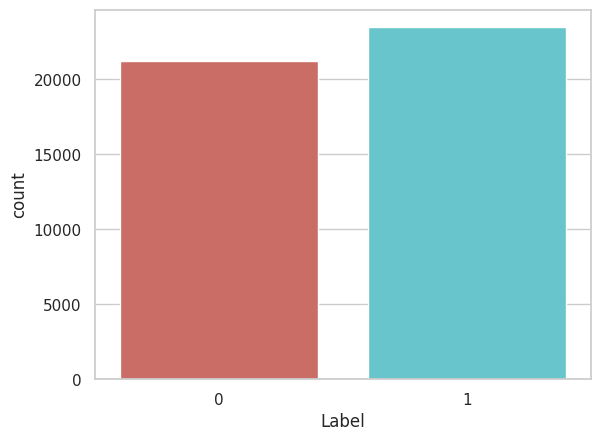

In [24]:
def create_distribution(dataFile):
    return sns.countplot(x='Label', data=dataFile, palette='hls')

create_distribution(df)

df['Label'].value_counts()

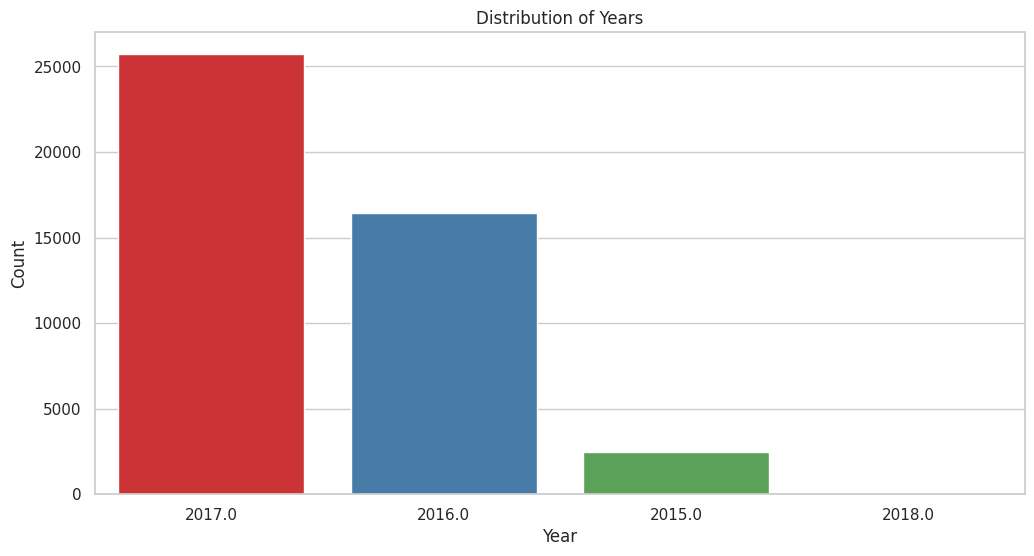

In [25]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', data=df, order=df['Year'].value_counts().index, palette='Set1')
plt.title('Distribution of Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

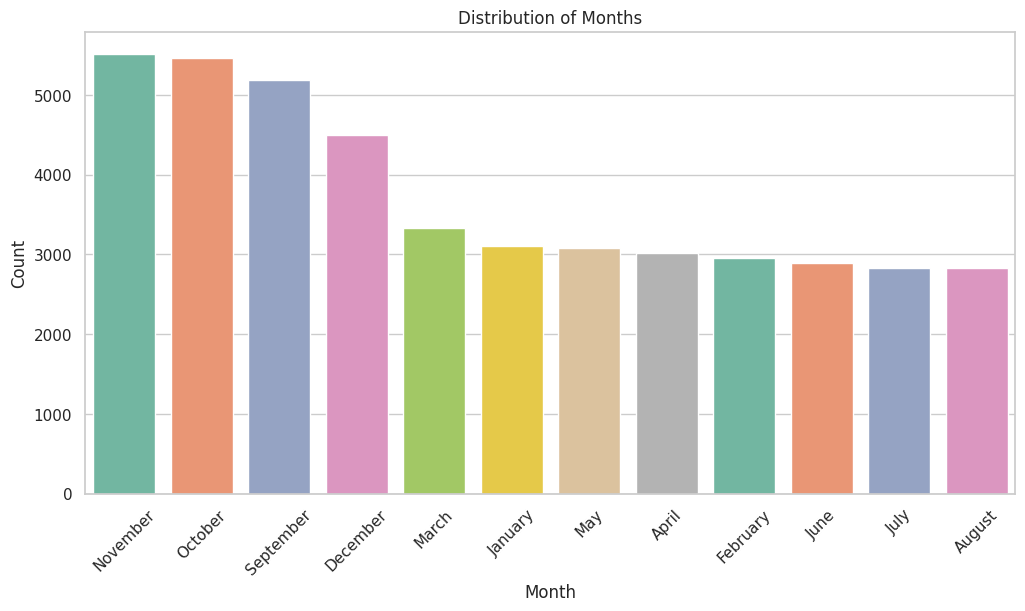

In [26]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Month', data=df, order=df['Month'].value_counts().index, palette='Set2')
plt.title('Distribution of Months')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

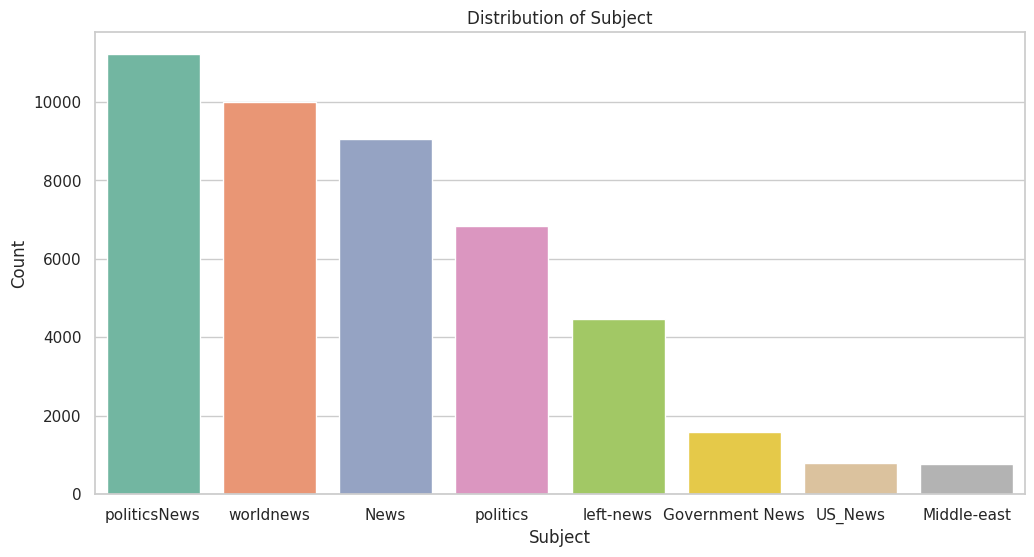

In [27]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Subject', data=df, order=df['Subject'].value_counts().index, palette='Set2')
plt.title('Distribution of Subject')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Bivariate Analysis

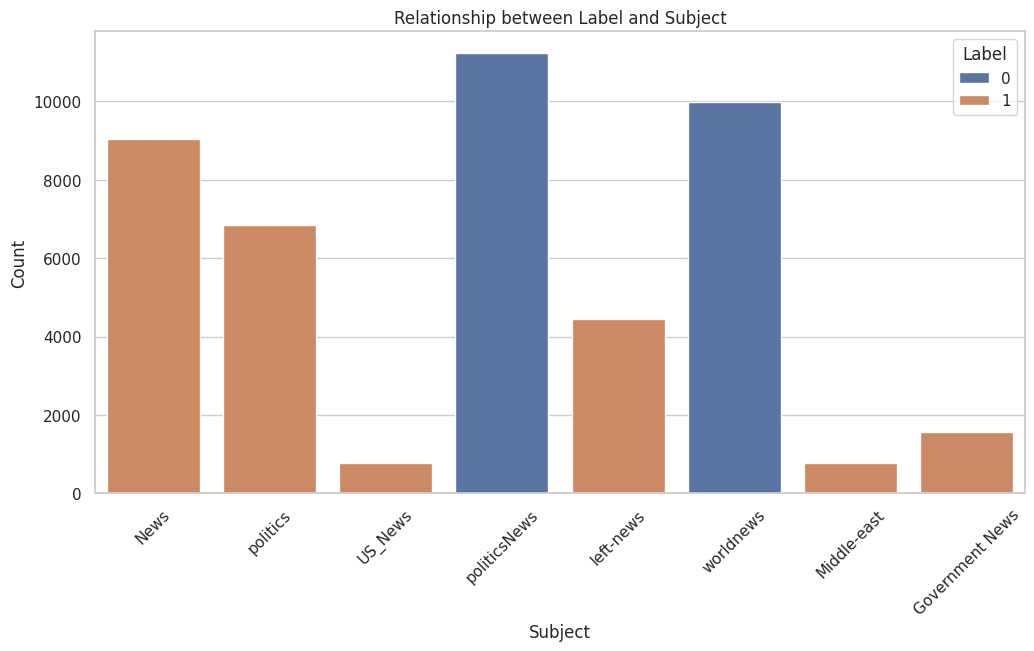

In [28]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Subject', hue='Label', data=df)
plt.title('Relationship between Label and Subject')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

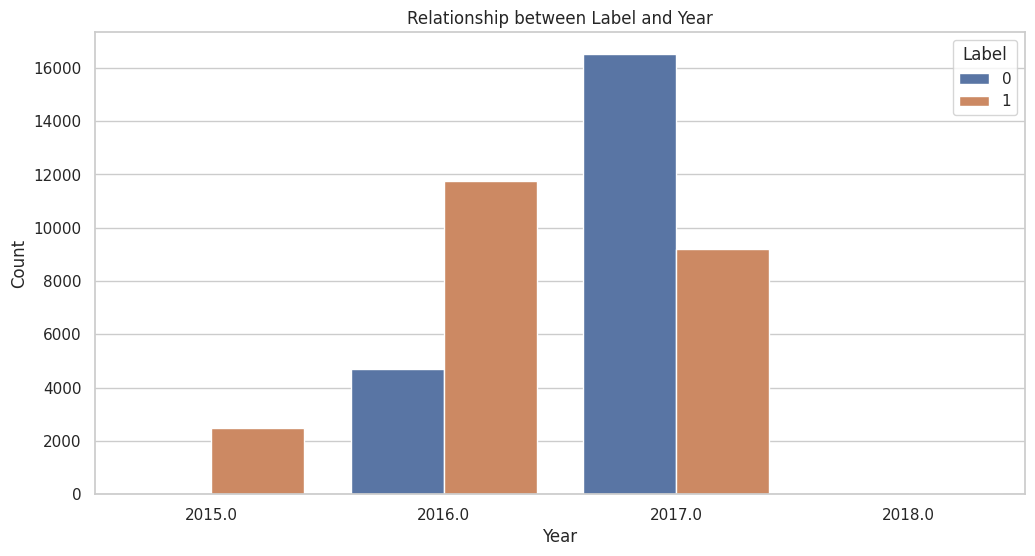

In [29]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', hue='Label', data=df)
plt.title('Relationship between Label and Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

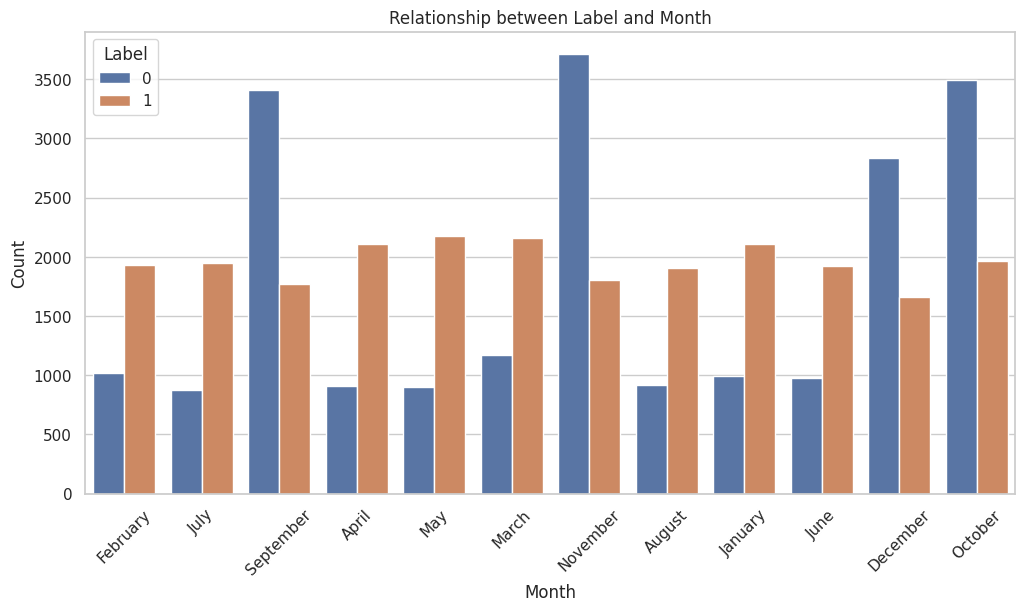

In [30]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Month', hue='Label', data=df)
plt.title('Relationship between Label and Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Bigrams Text

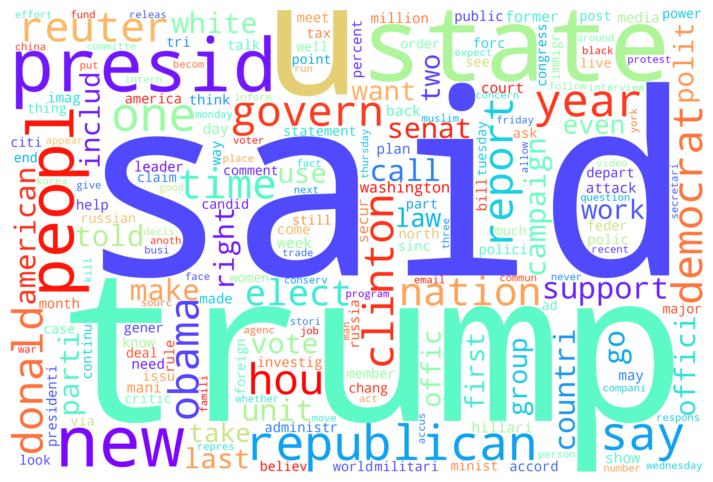

In [31]:
text = " ".join(df['Text'].astype(str))

wordcloud = WordCloud(width=3000, height=2000, random_state=1, background_color='white', colormap='rainbow', collocations=False, stopwords=STOPWORDS).generate(text)

# Plot
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

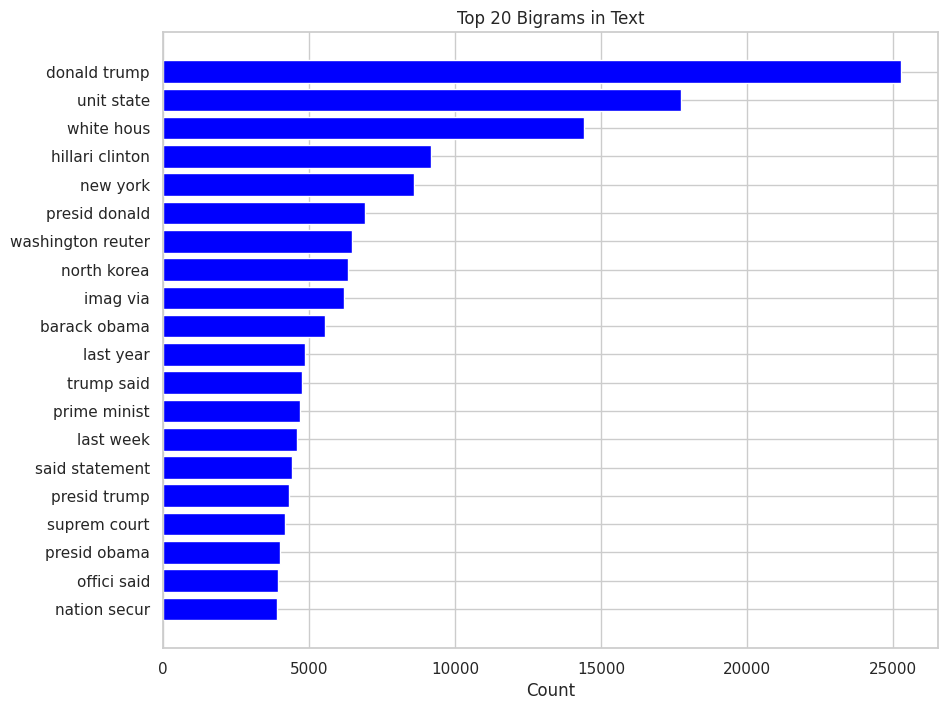

In [32]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_bigrams = get_top_n_bigram(df['Text'], 20)

df_bigrams = pd.DataFrame(common_bigrams, columns=['bigram', 'count'])

plt.figure(figsize=(10, 8))
plt.barh(df_bigrams['bigram'], df_bigrams['count'], color='blue')
plt.xlabel('Count')
plt.title('Top 20 Bigrams in Text')
plt.gca().invert_yaxis()
plt.show()

Bigrams Title

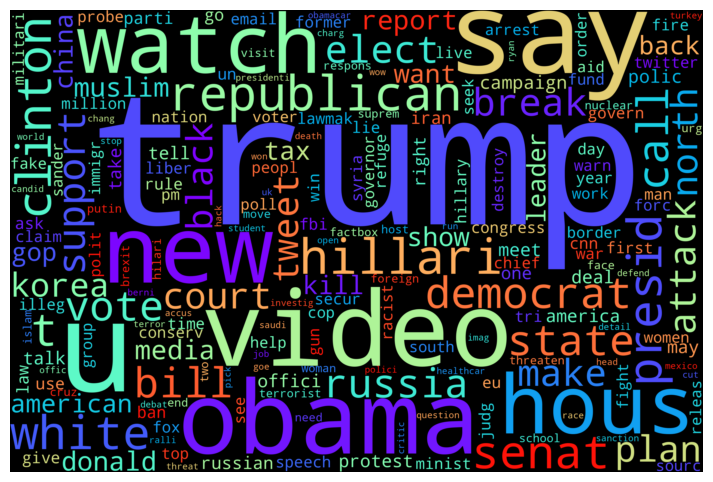

In [33]:
title = " ".join(df['Title'].astype(str))

wordcloud = WordCloud(width=3000, height=2000, random_state=1, background_color='black', colormap='rainbow', collocations=False, stopwords=STOPWORDS).generate(title)

# Plot
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

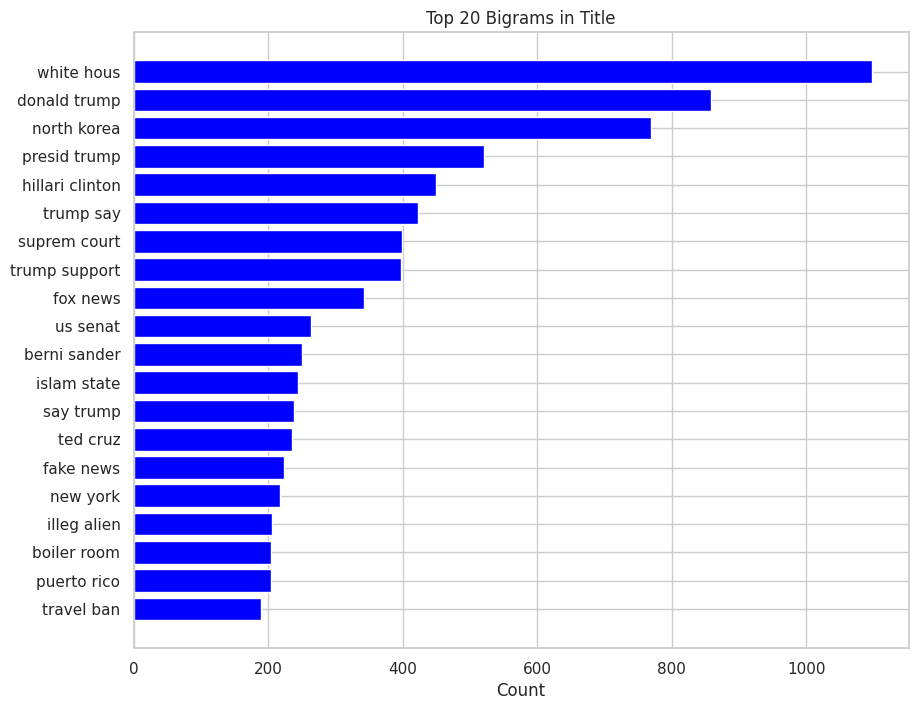

In [34]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_bigrams = get_top_n_bigram(df['Title'], 20)

df_bigrams = pd.DataFrame(common_bigrams, columns=['bigram', 'count'])

plt.figure(figsize=(10, 8))
plt.barh(df_bigrams['bigram'], df_bigrams['count'], color='blue')
plt.xlabel('Count')
plt.title('Top 20 Bigrams in Title')
plt.gca().invert_yaxis()
plt.show()

Wordcloud Fake vs Real News

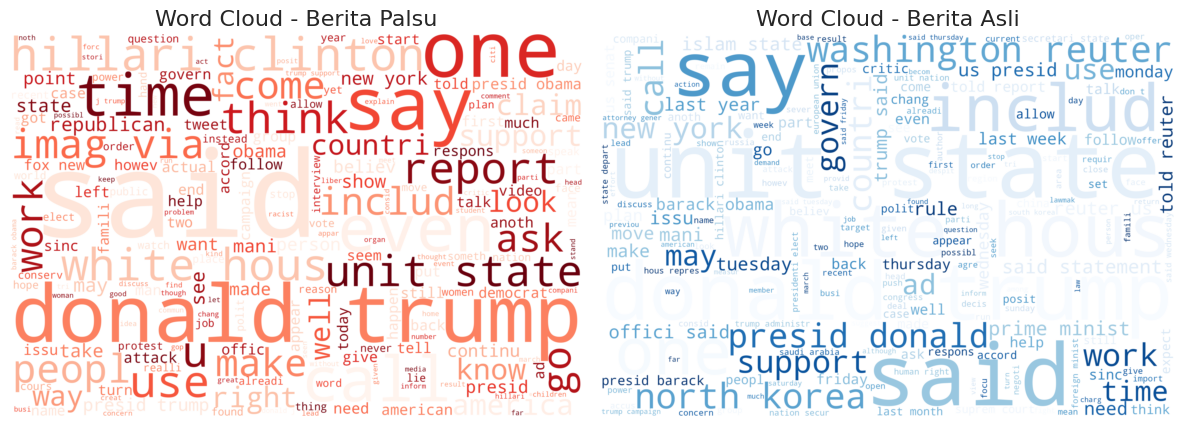

In [44]:
fake_news = df[df['Label'] == 1]
true_news = df[df['Label'] == 0]

# Gabungkan Title dan Text dalam setiap kategori
fake_text = " ".join((fake_news['Title'] + " " + fake_news['Text']).astype(str))
real_text = " ".join((true_news['Title'] + " " + true_news['Text']).astype(str))

# Buat word cloud untuk berita palsu
fake_wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=1,
    background_color='white',
    colormap='Reds',
    stopwords=STOPWORDS
).generate(fake_text)

# Buat word cloud untuk berita asli
real_wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=1,
    background_color='white',
    colormap='Blues',
    stopwords=STOPWORDS
).generate(real_text)

# Plot kedua word cloud
plt.figure(figsize=(12, 6))

# Word cloud untuk berita palsu
plt.subplot(1, 2, 1)
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Berita Palsu", fontsize=16)

# Word cloud untuk berita asli
plt.subplot(1, 2, 2)
plt.imshow(real_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Berita Asli", fontsize=16)

plt.tight_layout()
plt.show()

Sentiment Analysis

In [46]:
sia = SentimentIntensityAnalyzer()
res = {}

for i, row in tqdm(df.iterrows(), total=len(df), desc="Sentiment Analysis"):
    text = row['Text']
    my_id = row['Title']
    res[my_id] = sia.polarity_scores(text)

Sentiment Analysis:   0%|          | 0/44689 [00:00<?, ?it/s]

In [47]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Title'})
vaders = vaders.merge(df, how='left')

In [48]:
def polarity_score(compound):
    if compound > 0.05:
        return "positive"
    elif compound < -0.5:
        return "negative"
    else:
        return "neutral"

vaders['sentiment'] = vaders['compound'].apply(lambda val: polarity_score(val))

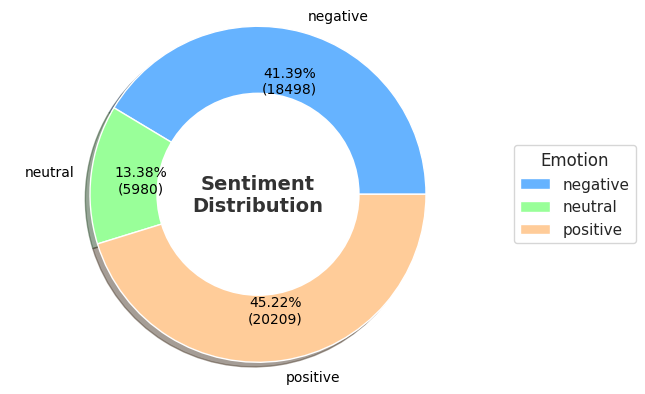

In [49]:
unique_emotion = vaders['sentiment'].unique()

explode = [0] * len(unique_emotion)

emotion_counts = vaders.groupby("sentiment").size()

colors = ['#66b3ff', '#99ff99', '#ffcc99']

fig, ax = plt.subplots()

wedges, texts, autotexts = ax.pie(
    x=emotion_counts,
    labels=emotion_counts.index,
    autopct=lambda p: f'{p:.2f}%\n({int(p*sum(emotion_counts)/100)})',
    wedgeprops=dict(width=0.7),
    textprops=dict(size=10, color="black"),
    pctdistance=0.7,
    colors=colors,
    explode=explode,
    shadow=True
)

center_circle = plt.Circle((0, 0), 0.6, color='white', fc='white', linewidth=1.25)
fig.gca().add_artist(center_circle)

ax.text(0, 0, 'Sentiment\nDistribution', ha='center', va='center', fontsize=14, fontweight='bold', color='#333333')

ax.legend(emotion_counts.index, title="Emotion", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax.axis('equal')

plt.show()

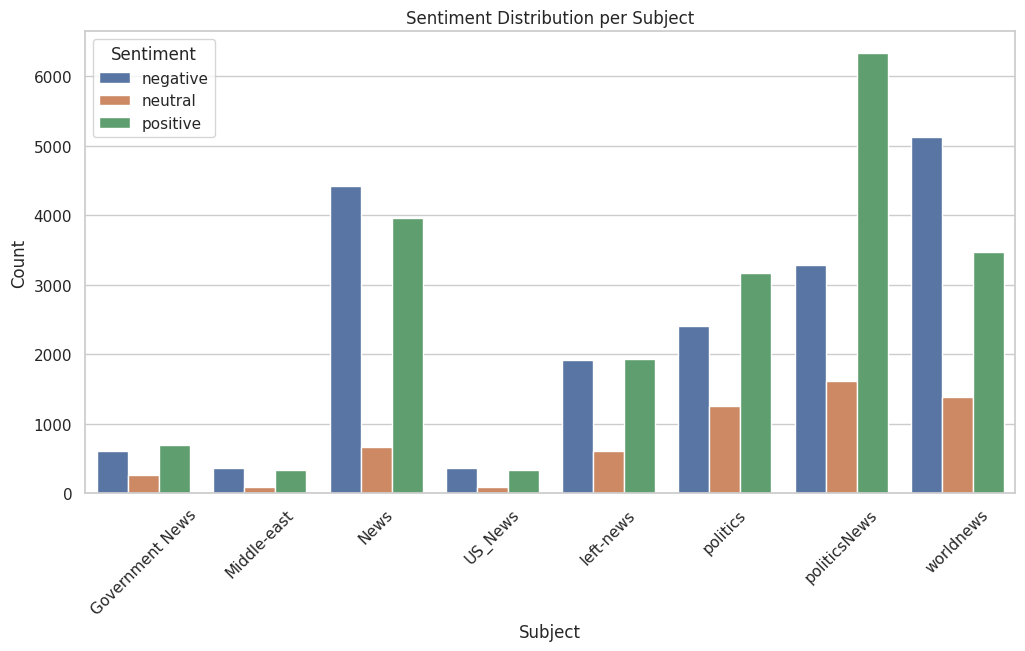

In [50]:
sentiment_counts = vaders.groupby(['Subject', 'sentiment'])['sentiment'].count().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(x='Subject', y='count', hue='sentiment', data=sentiment_counts)

plt.title('Sentiment Distribution per Subject')
plt.xlabel('Subject')
plt.ylabel('Count')

plt.legend(title='Sentiment')

plt.xticks(rotation=45)

plt.show()

##Preprocessing

In [51]:
from imblearn.over_sampling import RandomOverSampler
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix

In [52]:
df1 = vaders.copy()

In [53]:
df1['content'] = df1['Title'] + ' ' + df1['Text']

In [54]:
X = df1['content']
y = df1['Label']

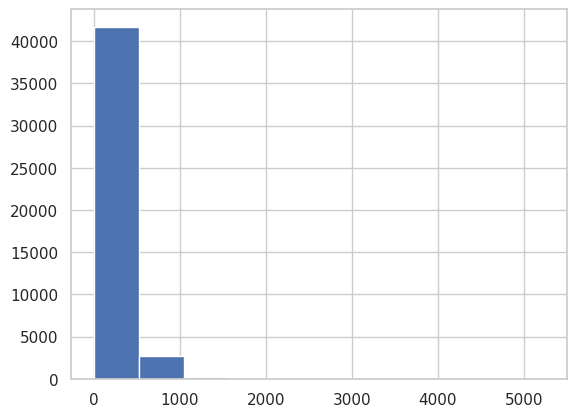

In [55]:
text_lengths = X.apply(lambda x: len(x.split(" ")))
plt.hist(text_lengths)
plt.show()

Data Scaling

In [56]:
#Scaling "Label"
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(df1['content'].values.reshape(-1, 1), df1['Label'])
X_res = X_res.flatten()

In [57]:
tokenizer = Tokenizer(num_words=50000, oov_token='OOV')
tokenizer.fit_on_texts(X_res)
sequences = tokenizer.texts_to_sequences(X_res)
padded = pad_sequences(sequences, maxlen=1000)

Split Data

In [58]:
X_train, X_test, y_train, y_test = train_test_split(padded, y_res, test_size=0.2, random_state=42)

##Model RNN

In [59]:
import tensorflow as tf
print(tf.__version__)

2.17.1


In [60]:
model = Sequential()

model.add(Embedding(input_dim=50000, output_dim=16, input_length=1000))
model.add(SimpleRNN(64, activation='relu', dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.build(input_shape=(None, 1000))  # Input batch size dan sequence length
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 1000, 16)            │         800,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ (None, 64)                  │           5,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 805,249 (3.07 MB)

 Trainable params: 805,249 (3.07 MB)

 Non-trainable params: 0 (0.00 B)

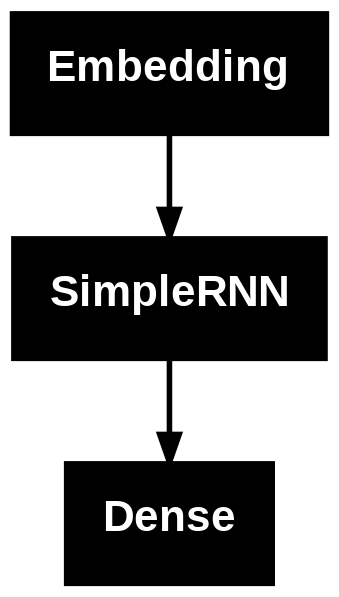

In [61]:
plot_model(model, to_file='model.png')

In [62]:
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=32, callbacks=[early_stopping])

Epoch 1/20
1174/1174 ━━━━━━━━━━━━━━━━━━━━ 419s 355ms/step - accuracy: 0.8506 - loss: 0.3493 - val_accuracy: 0.9814 - val_loss: 0.0589
Epoch 2/20
1174/1174 ━━━━━━━━━━━━━━━━━━━━ 395s 337ms/step - accuracy: 0.9880 - loss: 0.0381 - val_accuracy: 0.9861 - val_loss: 0.0444
Epoch 3/20
1174/1174 ━━━━━━━━━━━━━━━━━━━━ 444s 339ms/step - accuracy: 0.9951 - loss: 0.0170 - val_accuracy: 0.9906 - val_loss: 0.0390
Epoch 4/20
1174/1174 ━━━━━━━━━━━━━━━━━━━━ 453s 348ms/step - accuracy: 0.9979 - loss: 0.0077 - val_accuracy: 0.9722 - val_loss: 0.0754
Epoch 5/20
1174/1174 ━━━━━━━━━━━━━━━━━━━━ 448s 353ms/step - accuracy: 0.9933 - loss: 0.0207 - val_accuracy: 0.9870 - val_loss: 0.0440


In [63]:
evaluation_result = model.evaluate(X_test, y_test)

print("Test Loss:", evaluation_result[0])
print("Test Accuracy:", evaluation_result[1])

294/294 ━━━━━━━━━━━━━━━━━━━━ 18s 62ms/step - accuracy: 0.9895 - loss: 0.0404
Test Loss: 0.03903528302907944
Test Accuracy: 0.9906303286552429


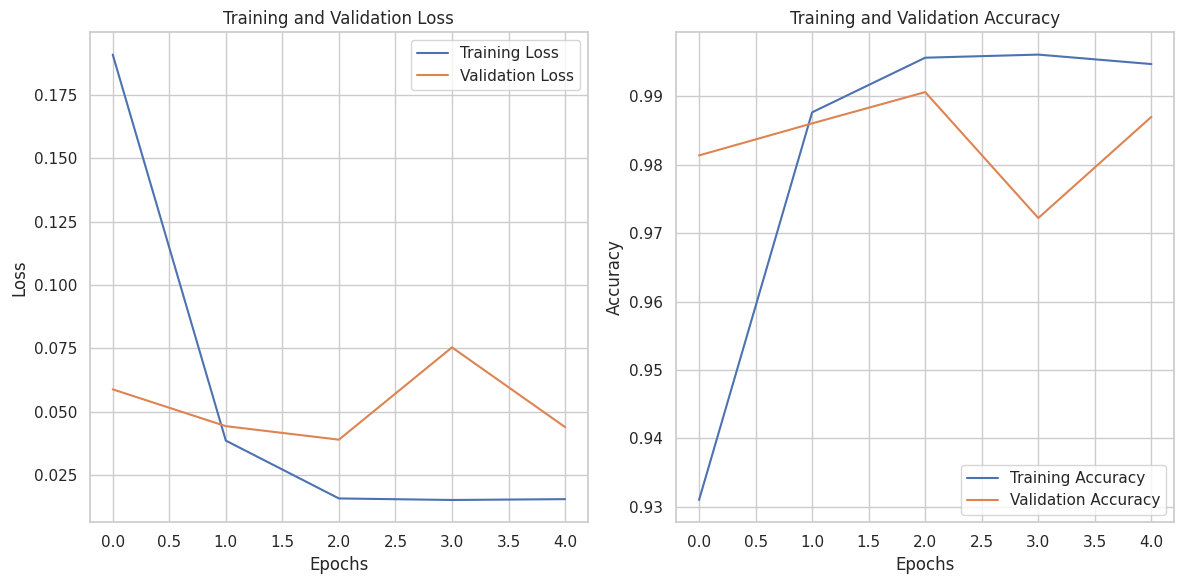

In [64]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [67]:
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

294/294 ━━━━━━━━━━━━━━━━━━━━ 17s 58ms/step
Precision: 0.9941507798960139
Recall: 0.9868817204301076
F1-Score: 0.9905029138786963
